In [95]:
import numpy as np
from sklearn.linear_model import LogisticRegression , LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits , load_iris
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler , LabelEncoder


In [3]:
d = load_digits()
dir(d)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
data = pd.DataFrame(d.data)
data['target'] = d.target

In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


model_accuracy : 0.98


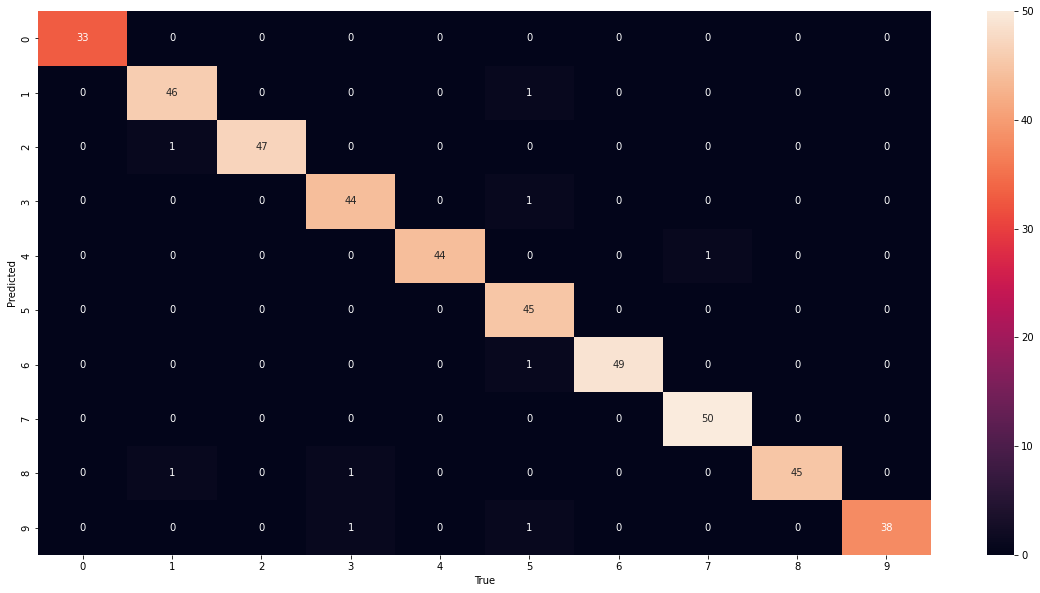

In [67]:
X = data.drop('target' , axis = 1)
y = data.target
def classify(model , X ,y):
    
    xtrain , xtest , ytrain , ytest = train_test_split(X,y)
    model.fit(xtrain , ytrain)
    
    print(f"model_accuracy : { model.score(xtest , ytest)}")
    
    ypred = model.predict(xtest)
    #PLotting
    
    cm = confusion_matrix(ytest ,ypred)
    plt.figure(figsize =(20,10))
    sns.heatmap(cm , annot =True)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    
classify(RandomForestClassifier() , X,y)


In [76]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [77]:
table = pd.DataFrame(iris.data , columns = iris.feature_names)
table['target'] = iris.target
table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Decision Tree Classifier


model_accuracy : 0.9473684210526315


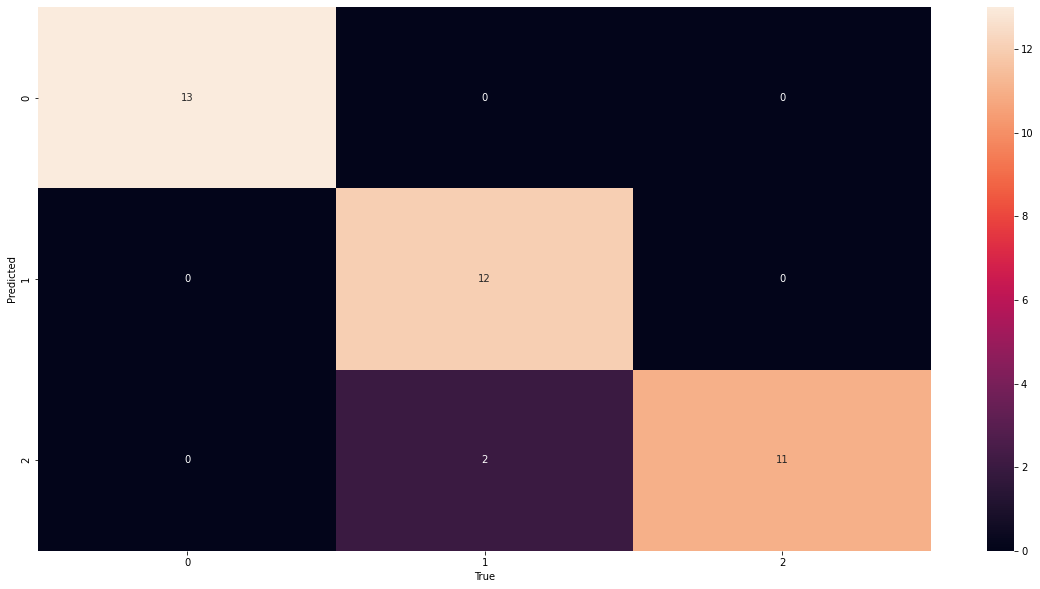

In [86]:
X = table.drop('target' , axis = 1)
y = table.target


classify(DecisionTreeClassifier(),X,y)

In [87]:
salary = pd.read_csv("salaries.csv")
salary.head()


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [89]:
salary.shape

(16, 4)

In [106]:
input_n = salary.drop("salary_more_then_100k", axis =1)
target = salary.salary_more_then_100k


In [107]:
salary.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [108]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [122]:
salary.company = le_company.fit_transform(salary.company)
salary.job = le_job.fit_transform(salary.job)
salary.degree = le_degree.fit_transform(salary.degree)


In [123]:
X = salary.drop('salary_more_then_100k' , axis = 1)
y = salary.salary_more_then_100k

model = DecisionTreeClassifier()
model.fit(X,y)
model.score(X,y)

1.0

In [138]:
le_company.classes_

array([0, 1, 2])

In [141]:
model.predict([[2,1,1]])

/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## Titanic

In [142]:
tit = pd.read_csv("titanic.csv")
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [154]:
tit.Embarked.value_counts() , tit.Pclass.value_counts() 

(S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 3    491
 1    216
 2    184
 Name: Pclass, dtype: int64)

In [155]:
tit.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [161]:
d = tit.drop(['Name', 'PassengerId' , 'Ticket' ,'Cabin'] , axis = 1)
d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [179]:
# nulls = []
# for col in nulls :
#     current_col = d[col]
#     current_col.fillna(current_col.mean())
    
nulls

['Age', 'Embarked']

In [189]:
d[nulls[1]].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [184]:
le_Embarked = LabelEncoder()
d['Embarkedd']= le_Embarked.fit_transform(d[nulls[1]])
le_Embarked.classes_

array(['C', 'Q', 'S', nan], dtype=object)

In [185]:
d.Embarkedd.value_counts()

2    644
0    168
1     77
3      2
Name: Embarkedd, dtype: int64

In [193]:
d.Embarked = d.Embarked.fillna("S")

In [194]:
d.Embarked.isna().sum()

0

In [199]:
d.Age = d.Age.fillna(d.Age.mean())

In [201]:
d.Sex = d.Sex.map({'male': 1, 'female': 2})
d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarkedd
0,0,3,1,22.000000,1,0,7.2500,S,2
1,1,1,2,38.000000,1,0,71.2833,C,0
2,1,3,2,26.000000,0,0,7.9250,S,2
3,1,1,2,35.000000,1,0,53.1000,S,2
4,0,3,1,35.000000,0,0,8.0500,S,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,2
887,1,1,2,19.000000,0,0,30.0000,S,2
888,0,3,2,29.699118,1,2,23.4500,S,2
889,1,1,1,26.000000,0,0,30.0000,C,0


model_accuracy : 0.820627802690583


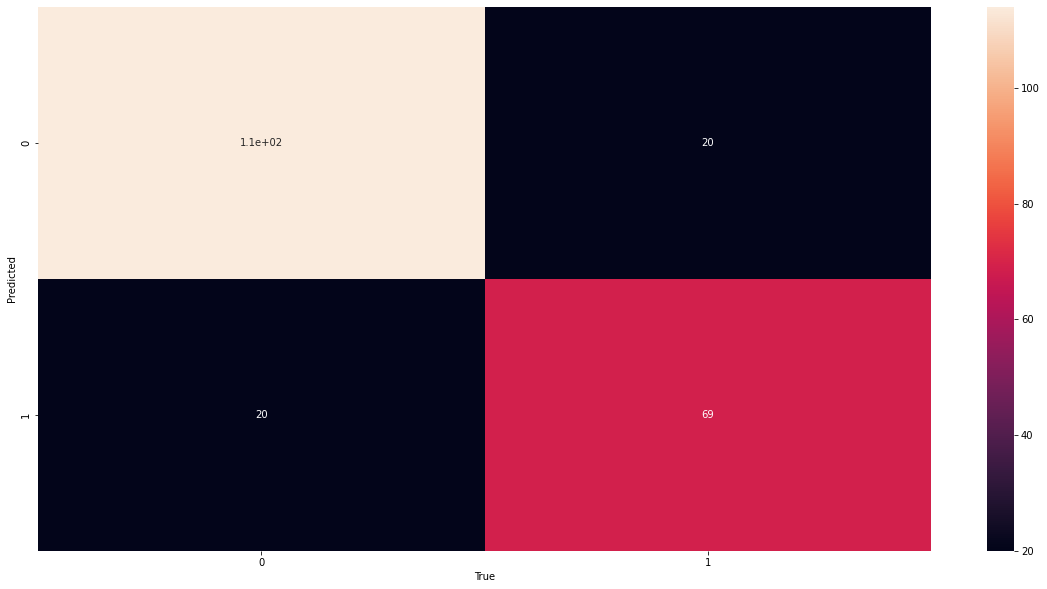

In [212]:
# d = d.drop('Embarkedd' , axis = 1)
X = d.drop('Survived' , axis =1 )
y = d.Survived

classify(DecisionTreeClassifier() , X,y)

model_accuracy : 0.7713004484304933


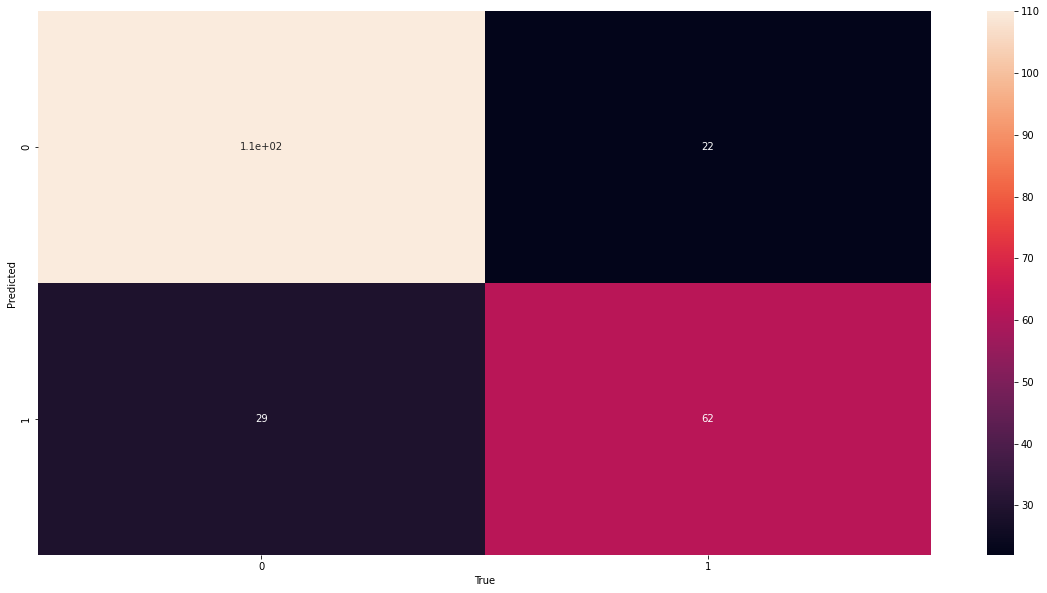

In [216]:
X = d.drop('Survived' , axis =1 )
y = d.Survived

classify(DecisionTreeClassifier() , X,y)


model_accuracy : 0.7713004484304933


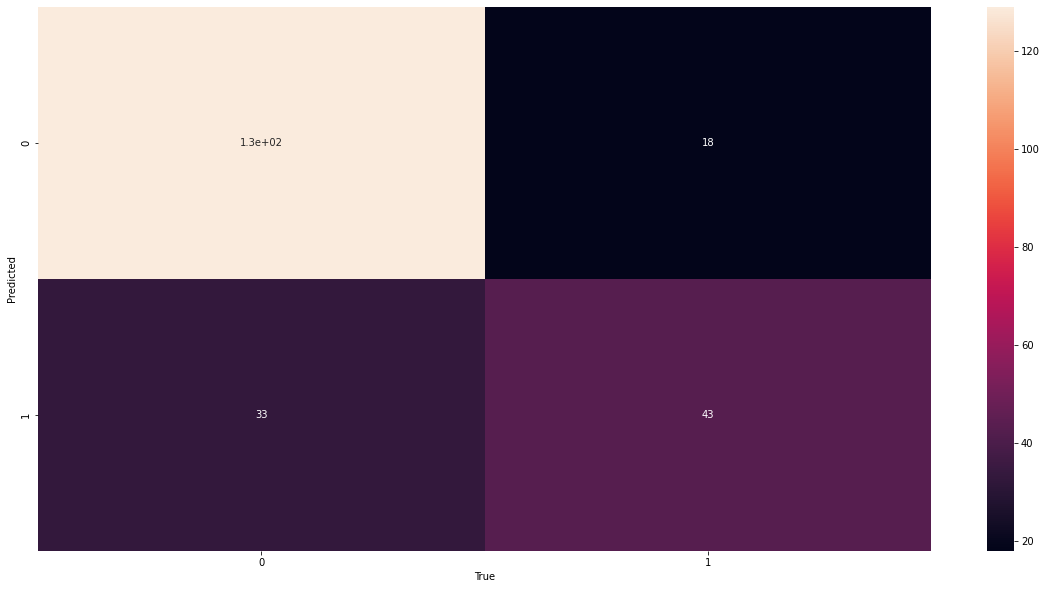

In [217]:
classify(LogisticRegression() , X,y)